# DBSCAN

Density - Based - Spacial - Clustering of - Aplications with - Noise

# Teória

El concepto de densidad usado por el algoritmo se define por medio de dos parámetros, $\epsilon$ y $M$. Una parametrización concreta de estos fija la densidad mínima deseada en los clústeres resultantes.

- $\epsilon$: El radio, o la medida de distancia en la cual se va a medir la densidad y/o alcanzabilidad de un punto y su vecindario.
- $M$: La medida de densidad; Número de puntos necesario dentro de la distancia fijada por $\epsilon$ para considerar si un punto es nucleo o no.


$$neigh_{\epsilon}(x_i) = \{ x_j \subset D: dist(x_i, x_j) \leq \epsilon \}$$


Una característica de este algoritmo es que aquellos puntos alejados del resto, en zonas de baja densidad, pueden no quedar asignados a clústeres. A diferencia de la mayoría de métodos de agrupamiento, se considera que esos puntos son producto del ruido y que no forman parte realmente de ningún agrupamiento.

Un par de ejemplos se dice que están conectados si cada uno de ellos pertenece al vecindario del otro.

## Terminología

1. **Punto nuclear**: Un punto es nuclear si dentro de la distancia $\epsilon$ tiene al menos $M$ ejemplos o puntos.
2. **Punto directamente denso alcanzable**: Son puntos que estan dentro de la distancia $\epsilon$, si el punto desde el que medimo es un punto nuclear. "SI ESE PUNTO ESTA DENTRO DE MI RADIO Y YO SOY UN PUNTO NUCLEAR; ESE PUNTO ES DIRECTAMENTE DENSO ALCANZABLE"
3. **Punto denso alcanzable**: Son puntos a los que se puede llegar mediante puntos directamente denso alcanzables pero que no estan dentro de la distancia $\epsilon$ del punto del que partimos, siendo este un punto nuclear. Es una **relación asimetrica**. "SI ESE PUNTO ESTA FUERA DE MI RADIO PERO PUEDO LLEGAR A EL MEDIANTE PUNTOS DIRECTAMENTE DENSO ALCANZABLES ENTONCES ESE PUNTO ES DENSO ALCANZABLE".
4. **Punto denso conectado**: Dos puntos estan denso conectados si se puede llegar del uno al otro si estan dentro de las distancias $\epsilon$ de otros puntos sin la necesidad de que ninguno de los dos puntos sean puntos nucleares. Es una relación simétrica. "SI PUEDO LLEGAR A ESE PUNTO SOLO TOCANDO LOS TERRITORIOS ESTABLECIDOS POR LOS RADIOS A LOS QUE PERTENEZCO ESE Y ESTE PUNTO ESTAN DENSO CONECTADOS.
5. **Punto borde**: Punto que esta a la distancia $\epsilon$ de un punto nuclear
6. **Punto ruido**: Un punto que no sea alcanzable desde cualquier otro punto es considerado ruido, es decir que no pertence a ninguno de los anteriores.


A continuación algunso ejemplos:

### EJEMPLO 1

$M = 5$

<img src= 'img/Puntos_dbscan.png'>

- x e y: **puntos nucleares**
- y desde x, z desde y: **puntos directamente denso alcanzables**
- a y z: **puntos denso conectados**
- z desde y: **punto borde**
- n: **punto ruido**

### EJEMPLO 2

$M = 4$

<img src= 'img/DBSCAN.png'>

- A y los puntos rojos: **puntos nucleares**
- B y C desde A: **puntos denso alcanzables**
- B y C: **puntos denso conectados**
- Puntos rojos dentro del radio de A: **puntos directamente denso alcanzables**
- N: **punto ruido**

## Cluster

**Conjunto de puntos nucleares denso conectados y el resto de puntos directametne denso alcanzables desde ellos**

## Pseudocógigo

DBSCAN Recibe: conjunto de entrenamiento, $x_0, x_1, ...,x_n$ , ; distancia $\epsilon$; número mínimo de vecinos $M$.

1. C = 1.
2. Para todo ejemplo, $x_i$:
 - 2.1. Si $x_i$ ya está asignado, continuar.
 - 2.2. Calcular vecindario $V$ de $x_i$ (dado E).
 - 2.3. Si $\mid V \mid < M$, asignar $x_i$ como ruido y continuar.
 - 2.4. Crear el clúster número $C$ y asignarle $x_i$.
 - 2.5. Para todo ejemplo $x_j \subset V$.
 
<blockquote> 
    
- 2.5.1. Si $x_j$ está asignado como ruido, asignarlo al clúster $C$ y continuar.
    
- 2.5.2. Si $x_j$ tiene otra asignación, continuar.
    
- 2.5.3. Asignar $x_j$ al clúster $C$.
    
- 2.5.4. Calcular el vecindario $V'$ de $x_j$ (dado E).
    
- 2.5.5. Si $\mid V' \mid \geq M$, entonces $V = V , V'$ .
    
</blockquote>
        
2.6. $C = C + 1$.

Devuelve: agrupamiento resultante.


# DBSCAN en sklearn

## parametros


1. **eps: float, default=0.5**

The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

2. **min_samples: int, default=5**

    The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself. If min_samples is set to a higher value, DBSCAN will find denser clusters, whereas if it is set to a lower value, the found clusters will be more sparse.
    
3. **metric: str, or callable, default= 'euclidean'**

The metric to use when calculating distance between instances in a feature array. If metric is a string or callable, it must be one of the options allowed by sklearn.metrics.pairwise_distances for its metric parameter. If metric is “precomputed”, X is assumed to be a distance matrix and must be square. X may be a sparse graph, in which case only “nonzero” elements may be considered neighbors for DBSCAN.

New in version 0.17: metric precomputed to accept precomputed sparse matrix.

4. **metric_params: dict, default=None**

Additional keyword arguments for the metric function.

New in version 0.19.

5. **algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'**

The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors. See NearestNeighbors module documentation for details.

6. **leaf_size: int, default=30**

Leaf size passed to BallTree or cKDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

7. **p: float, default=None**

The power of the Minkowski metric to be used to calculate distance between points. If None, then p=2 (equivalent to the Euclidean distance).

8. **n_jobs: int, default=None**

The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

## atributos

1. **core_sample_indices_; ndarray of shape (n_core_samples,)**

Indices of core samples.

2. **components_ ndarray of shape (n_core_samples, n_features)**

Copy of each core sample found by training.

3. **labels_ ndarray of shape (n_samples)**

Cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.

4. **n_features_in_int**

Number of features seen during fit.

New in version 0.24.

5. **feature_names_in_ ndarray of shape (n_features_in_,)**

Names of features seen during fit. Defined only when X has feature names that are all strings.

# Práctica

## Un toy example

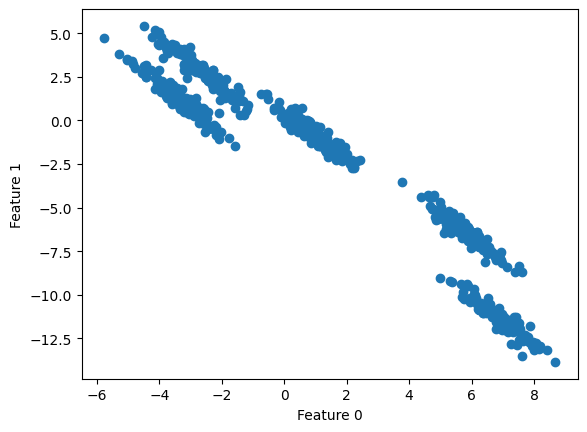

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generamos nuestro dataset
X, y = make_blobs(random_state=170, n_samples=600, centers = 5)
rng = np.random.RandomState(74)
transformation = rng.normal(size=(2, 2)) # para "estirar" los datos
X = np.dot(X, transformation)

# plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

### Kmeans como punto de referencia

In [3]:
from sklearn.preprocessing import StandardScaler

(600,)


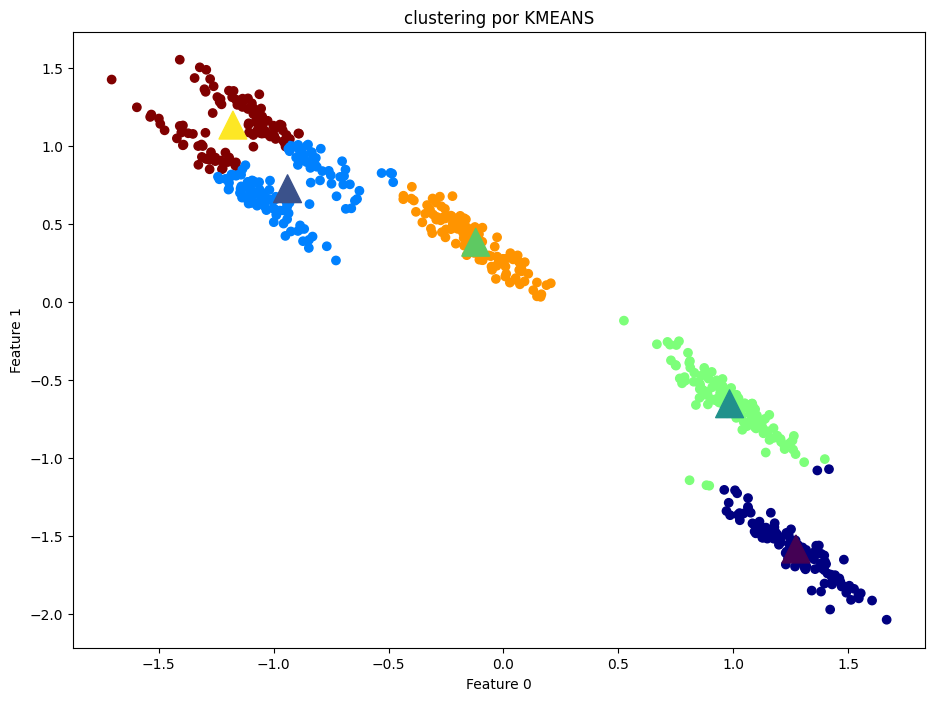

In [4]:
# escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# algoritmo kmeans
Km = KMeans(n_clusters=5, init= 'k-means++', n_init= 'auto')
Km.fit(X_scaled)
y_pred = Km.predict(X_scaled)

print(y_pred.shape)


# visualización
plt.figure(figsize= (11, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],
            c= Km.labels_, 
            cmap= 'jet')

plt.scatter(Km.cluster_centers_[:, 0], Km.cluster_centers_[:, 1], 
           marker= '^', 
           c= [0,1,2,3,4], 
           s= 400)

plt.title('clustering por KMEANS')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

k-means está diseñado para trabajar con la distancia Euclidea, no lidia bien con datos con una covarianza alta.

Una forma de arreglar esto era utilizar la distancia de Mahalanobis, que no deja de ser una generalización de la distancia Euclidea que tiene en cuenta las covarianzas de los datos.

Sin embargo, nosotros vamos a utilizar la recién aprendida técnica de clustering basado en densidad: **DBSCAN**.

Vamos a importar los paquetes necesarios:

## DBSCAN

Recomendación empezar con una $M$ baja y ajustar $\epsilon$.

In [5]:
from sklearn.cluster import DBSCAN

In [35]:
dbscan = DBSCAN(eps= 0.12, min_samples=3)
dbscan.fit(X_scaled)

DBSCAN(eps=0.12, min_samples=3)

In [36]:
print(dbscan)
print('\n')
print((np.unique(dbscan.labels_, return_counts=True)))
#print(dbscan.core_sample_indices_)
dbscan_cluster = np.unique(dbscan.labels_, return_counts=True)
dbscan_cluster[0], dbscan_cluster[1]

DBSCAN(eps=0.12, min_samples=3)
(array([-1,  0,  1,  2,  3,  4], dtype=int64), array([  3, 120, 119, 119, 120, 119], dtype=int64))


(array([-1,  0,  1,  2,  3,  4], dtype=int64),
 array([  3, 120, 119, 119, 120, 119], dtype=int64))

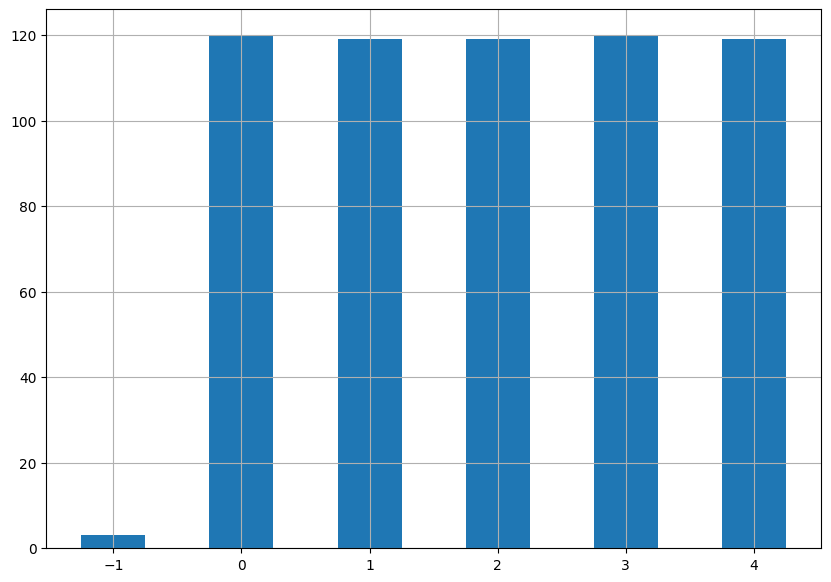

In [37]:
plt.figure(figsize= (10, 7))
# plt.hist(x= dbscan.labels_, 
#         align= 'left', 
#         histtype='barstacked')

plt.bar(x= dbscan_cluster[0], 
       height= dbscan_cluster[1], 
       width= 0.5, )
plt.grid()
plt.show()

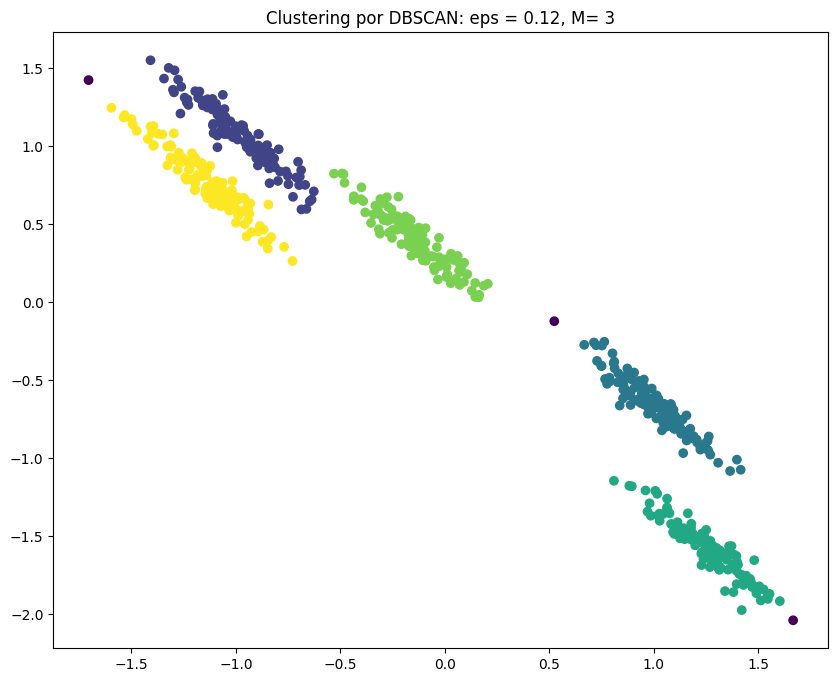

In [43]:
plt.figure(figsize= (10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c= dbscan.labels_)
plt.title('Clustering por DBSCAN: eps = 0.12, M= 3')
plt.show()

El DBSCAN encuentra los 5 clusters sin necesidad de especificar el número, y además nos marca ciertos puntos como outliers y les asigna la etiqueta de -1

## Comparación cuantitativa: DBSCAN VS Kmeans

Se utilizará el método de adjusted_rand_score 

In [42]:
from sklearn.metrics.cluster import adjusted_rand_score

# performance del kmeans
print('KMEANS ARI = ', adjusted_rand_score(y, y_pred))

# performance del DBSCAN
print('DBSCAN ARI= ', adjusted_rand_score(y, dbscan.labels_))

KMEANS ARI =  0.7337315728136816
DBSCAN ARI=  0.9936844336049284



## Efecto de la modificación de hiperparámetros

A continuación se discute el efecto de los hiperparametros del algoritmo, siempre que se hable de como cambia el resultado modificando un hiperparametro es que el otro esta fijado

### Como afecta el cambio de $M$



Aumentar $M$ produce menos clusters por que aumenta la cantidad de ejemplos que debe haber dentro del radio, es decir, la densidad necesaria para que un cluster sea considerado como tal aumenta, por lo tanto, hay más instancias clasificadas como ruido.

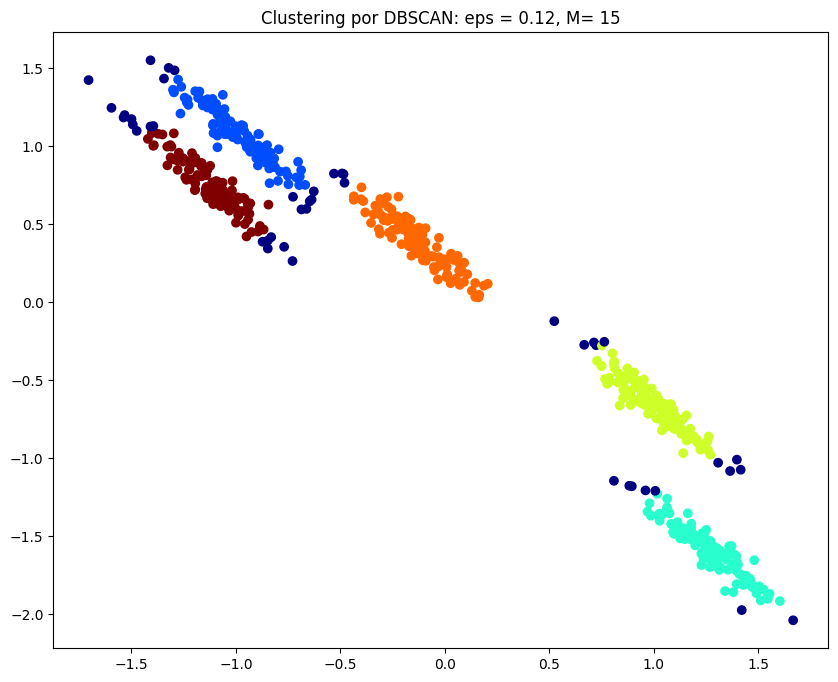

In [48]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps= 0.12, min_samples= 15)
dbscan.fit(X_scaled)

plt.figure(figsize= (10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], 
            c= dbscan.labels_, cmap= 'jet')
plt.title('Clustering por DBSCAN: eps = 0.12, M= 15')
plt.show()

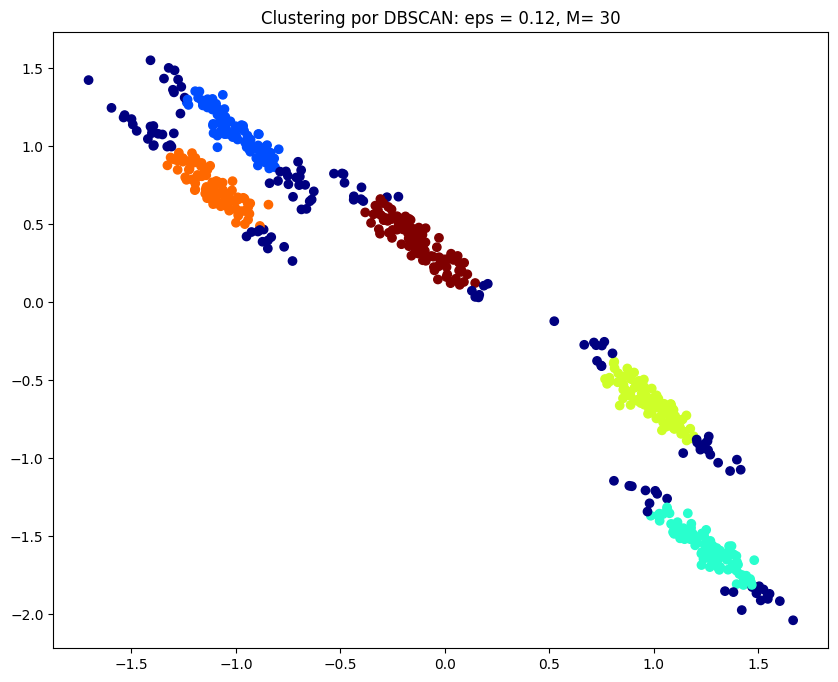

In [51]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps= 0.12, min_samples= 30)
dbscan.fit(X_scaled)

plt.figure(figsize= (10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], 
            c= dbscan.labels_, cmap= 'jet')
plt.title('Clustering por DBSCAN: eps = 0.12, M= 30')
plt.show()

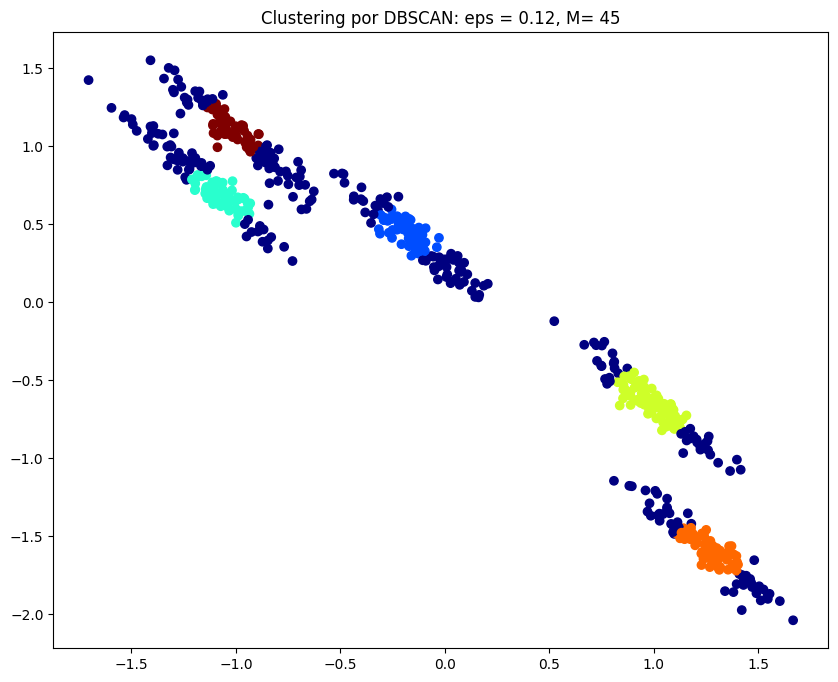

In [58]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps= 0.12, min_samples= 40)
dbscan.fit(X_scaled)

plt.figure(figsize= (10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], 
            c= dbscan.labels_, cmap= 'jet')
plt.title('Clustering por DBSCAN: eps = 0.12, M= 45')
plt.show()

Se puede observar como la tendencia es a aumentar la cantidad de instancias clasificadas como ruido u outlier, por el hecho de aumentar la condición de densidad para formar un vecindario


### Como afecta el cambio de $\epsilon$

Aumentar el tamaño del radio a considerar disminuye la cantidad de clusters encontrados por el algoritmo pues es más fácil que los ejemplos esten conectados entre si, y la condición de densidad de puntos mínimos se cumpla.

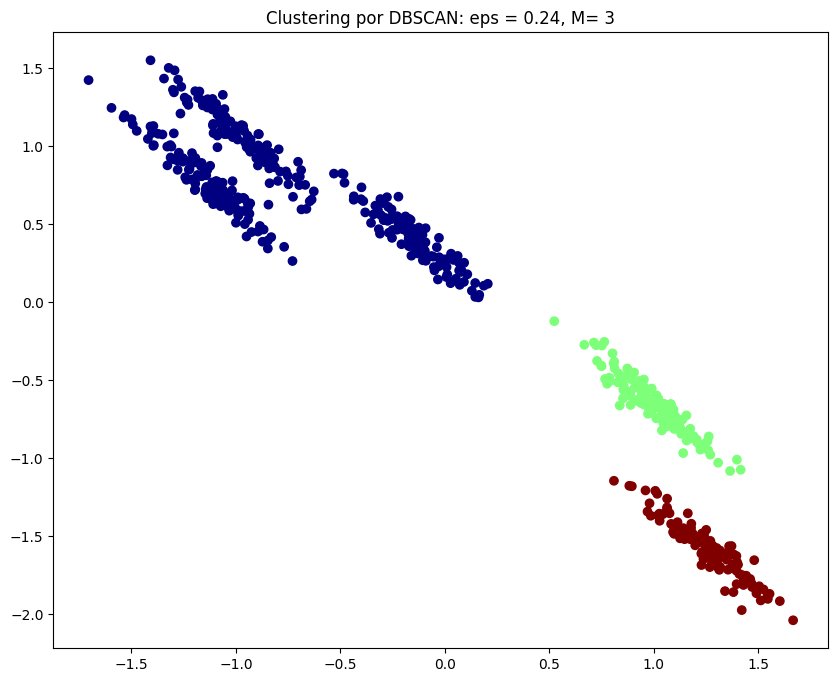

In [52]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps= 0.24, min_samples= 3)
dbscan.fit(X_scaled)

plt.figure(figsize= (10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], 
            c= dbscan.labels_, cmap= 'jet')
plt.title('Clustering por DBSCAN: eps = 0.24, M= 3')
plt.show()

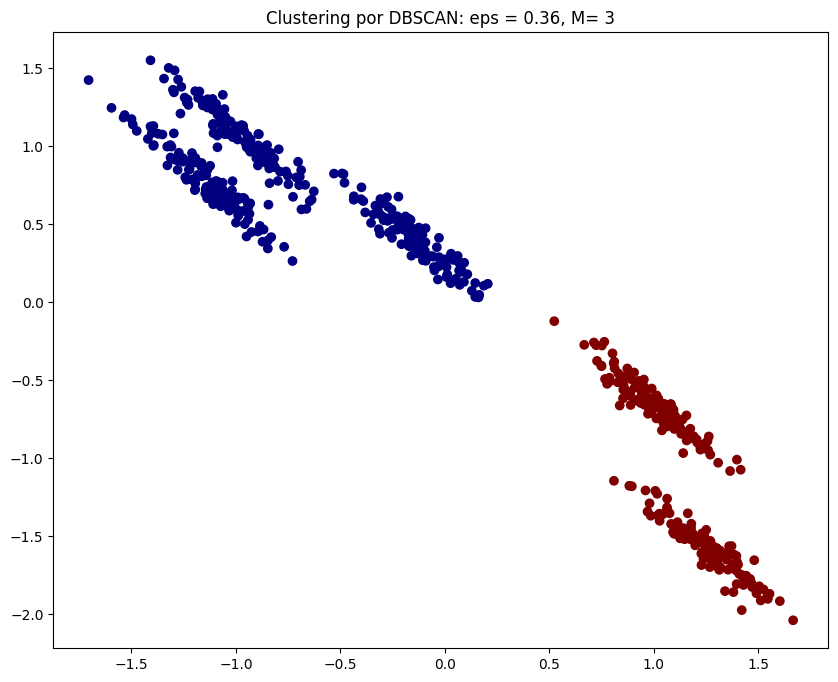

In [53]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps= 0.36, min_samples= 3)
dbscan.fit(X_scaled)

plt.figure(figsize= (10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], 
            c= dbscan.labels_, cmap= 'jet')
plt.title('Clustering por DBSCAN: eps = 0.36, M= 3')
plt.show()

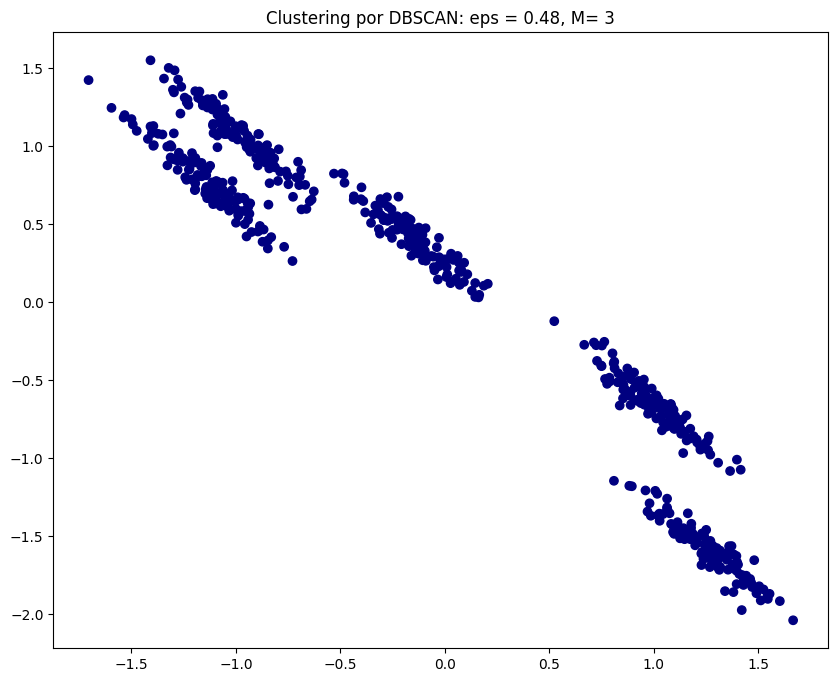

In [54]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps= 0.48, min_samples= 3)
dbscan.fit(X_scaled)

plt.figure(figsize= (10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], 
            c= dbscan.labels_, cmap= 'jet')
plt.title('Clustering por DBSCAN: eps = 0.48, M= 3')
plt.show()

## Ventajas de DBSCAN

- No es necesario especificar el número de clusters K 
- Definición basada en densidad
- Funciona con clusters de diferente tamaño y forma
- Generalizable a otros conceptos de densidad
- Funciona con diferentes medidas de distancia
- Capaz de filtrar outliers


## Desventajas de DBSCAN

- Definición compleja 
- Pesado computacionalmente
- Problemas con clusteres de diferente densidad
- Dos hiperparámetros a ajustar 


# Otras fuentes

Aunque sin duda alguna, la mejor herramienta que conozco para visualizar es esta:

- DBSCAN: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/
- k-means: https://www.naftaliharris.com/blog/visualizing-k-means-clustering

Solo tiene para estos dos algoritmos, pero merece la pena muchisimo echarle un vistazo.

FUENTE: https://towardsdatascience.com/dbscan-clustering-for-data-shapes-k-means-cant-handle-well-in-python-6be89af4e6ea

EJEMPLO DIDÁCTICO: https://github.com/qingkaikong/blog/tree/master/28_DBSCAN